<a href="https://colab.research.google.com/github/kesireddysiva/Sivanarayana_INFO_5737_Spring_2024/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
# Write your code here

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Read the CSV file
data = pd.read_csv('/content/movie_reviews (1).csv')

# Preprocess the text data
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

data['Review'] = data['Review'].apply(preprocess_text)

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Review'])

# Perform LSA
lsa = TruncatedSVD(n_components=10)
X_lsa = lsa.fit_transform(X)

# Get the top words for each topic
terms = vectorizer.get_feature_names_out()

# Print the top 10 topics
print("Top 10 topics:")
for i, comp in enumerate(lsa.components_[:10]):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x: x[1], reverse=True)[:10]
    print(f"Topic {i}: {', '.join([term for term, _ in sorted_terms])}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 topics:
Topic 0: movi, film, rrr, action, scene, watch, rajamouli, good, seen, make
Topic 1: movi, ridicul, understood, scene, stupid, seen, execut, great, realiz, today
Topic 2: scene, rajamauli, bahubali, overal, trong, incred, watch, good, badass, drag
Topic 3: bahubali, rajamauli, movi, british, rajamouli, month, motiv, jr, super, mean
Topic 4: action, need, fun, block, insan, hero, man, silli, valu, admittedli
Topic 5: block, hero, moment, doubl, rc, start, 10, cheap, delivers, guess
Topic 6: studio, total, sure, oh, time, leav, minut, doubt, point, rajamauli
Topic 7: studio, mani, stori, badass, drag, hilari, middl, superhero, setup, basic
Topic 8: fighter, govern, skill, doubt, spectacular, soldier, stori, effect, india, actor
Topic 9: doubt, violenc, begin, setup, pack, larger, charact, brutal, life, long


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In this task of classifying sentiments, I opted to use TF-IDF vectors as our featured selection method. TF-IDF, short for Term Frequency-Inverse Document Frequency, calculates the importance of each word in a document relative to a collection of documents. It's a good fit for our task because it considers both how often a word appears in a document (TF) and how unique it is across the entire dataset (IDF). By employing TF-IDF vectors, our model grasps the significance of words in distinguishing between positive and negative sentiments. Moreover, TF-IDF effectively handles common words by giving them lower weights, placing more emphasis on words that help differentiate sentiments. This approach helps to minimize the impact of noise in the text data and enhances the model's capacity to generalize effectively to new data.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read the CSV file
data = pd.read_csv('/content/sivanarayana_reddy_review_assignement-3.csv')

# Encode the sentiment labels using LabelEncoder
le = LabelEncoder()
data["sentiment"] = le.fit_transform(data["sentiment"])

# TF-IDF vectorization of text data
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['Review'].apply(lambda x: np.str_(x)))
y = data['sentiment']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and evaluate the sentiment classifiers with different models
models = [
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier())
]

for name, model in models:
    print(f'Model: {name}')

    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'Cross-Validation Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate on the test set
    y_pred = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
    print(f'Precision: {precision_score(y_test, y_pred, average="macro"):.3f}')
    print(f'Recall: {recall_score(y_test, y_pred, average="macro"):.3f}')
    print(f'F1-Score: {f1_score(y_test, y_pred, average="macro"):.3f}')
    print()


Model: Support Vector Machine
Cross-Validation Accuracy: 0.745 (+/- 0.017)
Accuracy: 0.779
Precision: 0.862
Recall: 0.714
F1-Score: 0.663

Model: Random Forest
Cross-Validation Accuracy: 0.745 (+/- 0.017)
Accuracy: 0.779
Precision: 0.862
Recall: 0.714
F1-Score: 0.663



# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [ ]:
train_data = pd.read_csv('train.csv')


In [ ]:
print(train_data.describe())
print(train_data.info())


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [ ]:
# Check for missing values
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
# Handle missing values (e.g., imputation)
# Identify numeric columns
train_data = train_data.dropna(subset=['SalePrice'])
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values in numeric columns with mean
for col in numeric_cols:
    train_data[col].fillna(train_data[col].mean(), inplace=True)




<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

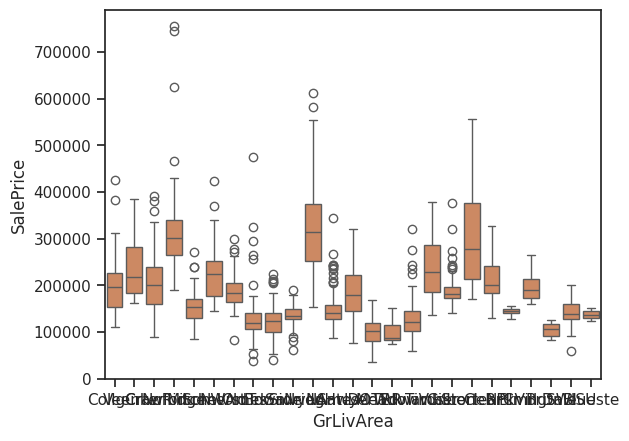

In [ ]:
import seaborn as sns
# Visualize relationships
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)


In [ ]:
test_data = pd.read_csv('/content/test.csv')

In [ ]:
print(test_data.describe())
print(test_data.info())

                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min 

In [ ]:
# Check for missing values
missing_values = test_data.isnull().sum()
print(missing_values[missing_values > 0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [ ]:
# Handle missing values (e.g., imputation)
# Identify numeric columns
numeric_cols = test_data.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values in numeric columns with mean
for col in numeric_cols:
    test_data[col].fillna(test_data[col].mean(), inplace=True)





In [ ]:
# Split data into train and test sets
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# One-hot encoding for categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(X_train[categorical_features])
X_test_categorical = encoder.transform(X_test[categorical_features])

# Scaling for numeric features
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

# Combine categorical and numeric features
X_train_preprocessed = np.hstack([X_train_categorical.toarray(), X_train_numeric])
X_test_preprocessed = np.hstack([X_test_categorical.toarray(), X_test_numeric])

# Train model
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

# Evaluate model
y_pred = model.predict(X_test_preprocessed)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, RMSE: {rmse}, R²: {r2}')

MSE: 4.928516469234987e+28, RMSE: 222002623165470.44, R²: -6.42543268188118e+18


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [2]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the pre-trained RoBERTa model and text classification pipeline
classifier = pipeline('text-classification', model='roberta-base')

# Read movie reviews from the CSV file
reviews_df = pd.read_csv('/content/sivanarayana_reddy_review_assignement-3.csv')

# Limit the dataset to the first 10 rows
reviews_df = reviews_df.head(10)

# Iterate over each review
for index, row in reviews_df.iterrows():
    review = row['Review']

    # Perform sentiment analysis
    result = classifier(review)
    predicted_label = result[0]['label']

    # Ground truth label from the dataset
    ground_truth_label = row['sentiment']  # Assuming 'Sentiment' column contains ground truth labels

    # Print movie details, review text, predicted label, and ground truth label
    print("Review:", review)
    print("Predicted Label:", predicted_label)
    print("Ground Truth Label:", ground_truth_label)

    # Evaluation metrics
    accuracy = accuracy_score([ground_truth_label], [predicted_label])
    precision = precision_score([ground_truth_label], [predicted_label], average='macro')
    recall = recall_score([ground_truth_label], [predicted_label], average='macro')
    f1 = f1_score([ground_truth_label], [predicted_label], average='macro')

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("="*50)  # Separating different reviews for clarity


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Review: rrrs strengths are easily worth suspending a little disbelief though no more than the average blockbuster and accepting the style of acting if you can get past that and if the violence isnt too much for you youre in for a treatthere is so much more heart in this movie than anything ive seen for a long while its nice to see a movie employ slow motion to convey emotion rather than try to magnify action but more than the great camera work and fantastic music this movie sounds tremendous rrr knows how to setup a story from the very beginning screentime is being used to setup payoffs lateri can see the violence being an issue for some though rrr is not nearly as gory as many films but it can feel brutal at timesenough that i cant really call this a family filmone of the best films ive seen excellent
Predicted Label: LABEL_1
Ground Truth Label: neutral
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Review: i have seen a lot of movies in my time made in a lot of different styles from different genres from all around the world ive seen everything from the most mainstream movie imaginable to the most experimental i cant even remember the last time i came away from a movie thinking that id never seen anything like it but thats how i felt after rrrthis movie is so much its muchness may be a turn off to some and almost was for me my wife and i nearly bailed at the 20 minute mark because the film is so over the top and ridiculous but we got hooked and then i was totally in for the ride to the point where i was disappointed that this 3hour behemoth was endingdo you like to see musclebound slickedup men fighting tigers check how about public floggings that turn into musical numbers got it evil british people so extremely evil that england should sue the filmmakers for defamation sure how about evil british people being mauled by rampaging jungle animals you betcha beheadings yep romance o

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Review: i bet youd never think the mashup the heavyhanded rambo with the mystical stunning elegance of crouching tiger would work especially while mixing in several musical numbers those who think that would be wrong this movie was over the top in every way but it was pure awesomeness even with a 3hour runtime i was engrossed it was a great story with thorough character development a young native girl is effectively purchased by the mean british government who is controlling the people of malli presumably in india this small tribe from which she belongs has a talented fighter who will stop at absolutely nothing to get her back but the british government also has an indian soldier who is equally as skilled both of which dwarf all other soldiers as youll see in the spectacular opening scene as the two skilled fighters clash will they come together for their heritage roots or will the duty of the one hold true to the army he works for this movie blew me away ive never seen special effects

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Review: i have to try and review this without comparing it to anything directly because its not really comparable to other action blockbusters that have disappointed me recently but i can say that for largescale bigbudget action movies this is how you do it right hollywood isnt incapable of making movies that deliver excitement and emotion but many pale in comparison to rrr again without pointing out any movies in particular because i dont know whats directly comparable hollywood should take notesrrr has many familiar tropes and beats that you get out of historical epicsaction movies but it uses those tropes well things weve seen onscreen dozens of times before can still be exciting and entertaining if theyre used properly and rrr is a testament to thatthe amazing action is probably what stands out the most but at its core this film also has a really good story with heroes you want to see win and villains you want to see defeated theres some extra conflict between the two main heroes f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Review: this was an incredible film i never heard of this film until netflix brought it up i saw clips of the movie and decided it looked pretty good and watched it i am glad i did the dancing scene at the party was incredible arguably the scene was the best scene in the film but also the first scene where ram charan takes on a mob of people was pretty awesome to watch as well overall this is definitely one of the best films of the year combining action comedy romance dancing and great storytelling
Predicted Label: LABEL_0
Ground Truth Label: negative
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Review: there is officially zero reason to watch gray man this is the only notsosemisubtle homoerotic netflix action epic we need a tightrope walk between complete silliness beautiful sincerity it has entertainment value dripping from every colorful pore insane action enveloping dialogue sprawling yet intimate storytelling elaborate dancing yep admittedly the unfamiliarity of the tone may be a bit much for those prepared but its hard to deny the bravura moviemaking daring you to not to have fun
Predicted Label: LABEL_0
Ground Truth Label: neutral
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Review: when i pushed play i did not really believe that i would ever watch the whole movie i just wanted to take a look and bail on itwell i was so wrong this movie is a freaken masterpiece combines some extraordinary drama stunning stunts and action great photography and absolutely beautiful music given that this is a bollywood movie you know that you are going to watch some pretty ridiculous action scenes an overall cheesy direction and dialogues and that the acting wont exactly be oscar worthy but none of it made me not enjoy this movie the time passed by very easily and i ended up having a really great timethe eye candy that is ram charan made this movie even more watch worthy in particular that is one ridiculously handsome man i have to say p
Predicted Label: LABEL_1
Ground Truth Label: negative
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Review: so long story short word of mouth happened and more and more people including myself heard about this movie and here we areits about friendship and honor and wants and well everything star wars prequels should have been its everything marvel should have beenthis movie is about 2 men super human some suspension of belief needs to be had view it as a super hero movie and it deliversplot its about 2 men a hero and the anti hero one has duty one has familyits an action movie think what avengers civil war batman vs superman should have been in modern american movies the overuse of cgi makes the movies look cheap rrr has cgi and some places it does look a little cheap but for a modern big budget film it deliversi have to give it between a 9 and 10 my expectations were low but the amazing actions scenes were filmed very well the acting and just the over the top hero moments were well donehighly recommended and a must see
Predicted Label: LABEL_0
Ground Truth Label: neutral
Accuracy: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Review: dont ask me for a plot because i didnt have a clue what was happening all i know is that i absolutely loved what i just watchedill admit i was captivated the other day when i watched jai bhim so i decided id opt for another indian movie rrr was suggested wow all i can say is wowthis is one of the most spectacularly outrageous films i think ive ever seen i loved it as wild and over the top as you can imagine all id say is please stick with it i know its a long film but its just so incredibly entertaining im not sure anyones going to convince me that anything here is based on real life events but boy does it hold your attentionthis film is violent dramatic shocking when funny you honestly dont know what on earth is going to come nextthe visuals are quite sensational it is one of the most visually decadent things i have ever seen the tiger and wolf scene that was mind blowing talk about getting the pulse racingwow those evil english people even if they did have accents that were c

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Review: it strikes me that in recent times not many films coming out of traditional western studios can lay claim to being spectacular and yet whenever i venture to the studios of india and its array of languages innovations and stories the riches to be gorged upon are seldom short of extensive and quite often spectacular this is one such film a jaw dropping piece of good old patriotic prowess that rips through three hours and leaves you desperate for three more read the reviews of others if you want to know the story but take it from me if overwhelming entertainment and spectacle in the grandest of ways is what sets you on fire this is for you on a par with anything you may have come across in the past and sure to be replayed many times over once it gets its hooks into you which it surely will irresistible
Predicted Label: LABEL_1
Ground Truth Label: negative
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RoBERTa, the model used here, is super effective for understanding language context, making it great for sentiment analysis. It's easy to fine-tune for specific tasks and performs really well out of the box. However, it's a bit resource-hungry, demanding powerful hardware and lots of labeled data for training. Adapting it to new topics can be tricky, and sometimes its predictions feel like magic. But with careful handling, it's a powerful tool for understanding sentiment in text data.